In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import (Audio, display, clear_output)
import wave
import struct
import math

%matplotlib inline

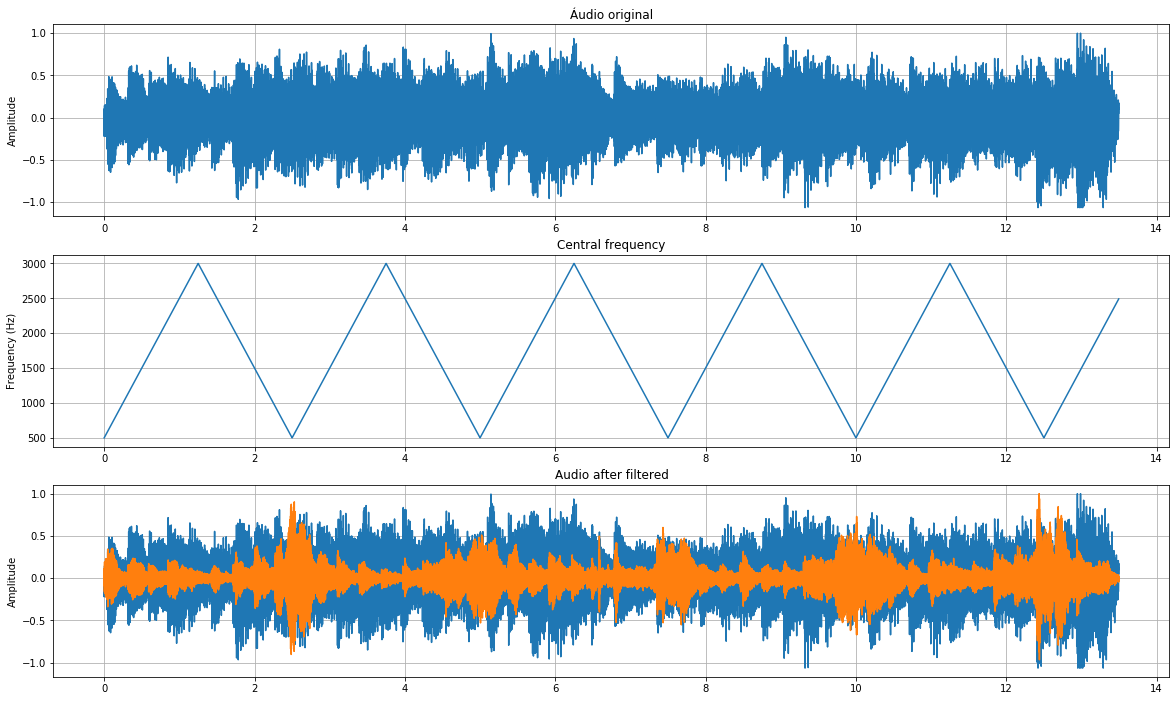

In [6]:
waveFile = wave.open('acoustic.wav', 'r')
fs = waveFile.getframerate()
N = waveFile.getnframes()

waveData = waveFile.readframes(waveFile.getnframes())

audio = np.array( struct.unpack('<' + str(waveFile.getnframes()) + 'h', waveData) )
tempo = np.linspace(0.0, N/fs , N)

# --- FILTRO --- #
d = 0.05
freq_min = 500
freq_max = 3000
freq_wah = 2000

delta = freq_wah/fs
tam = 2*math.ceil((freq_max - freq_min)/delta)

# -- Frequencia central -- #
i = 1
f1 = np.arange(freq_min, freq_max, delta)
f2 = np.arange(freq_max, freq_min, -delta)
Freq_central = np.concatenate([f1, f2])

while i < math.ceil(N/tam):
    Freq_central = np.concatenate([Freq_central, f1, f2])
    i += 1

Freq_central = Freq_central[0:N]

# -- Equacao de diferenças -- #
F1 = 2*np.sin((np.pi*Freq_central[0])/fs)
Q1 = 2*d

yh = np.zeros(N)
yb = np.zeros(N)
yl = np.zeros(N)

yh[0] = audio[0]
yb[0] = F1*yh[0]
yl[0] = F1*yb[0]

i = 1
#F1 = 2*np.sin((np.pi*Freq_central[i])/fs)
while i < N:
    yh[i] = audio[i] - yl[i-1] - Q1*yb[i-1]
    yb[i] = F1*yh[i] + yb[i-1]
    yl[i] = F1*yb[i] + yl[i-1]
    
    F1 = 2*np.sin((np.pi*Freq_central[i])/fs)
    i += 1

saida = yb
#saida = audio - yb
saida = saida/max(np.abs(saida))
saida2 = yl/max(np.abs(yl))
saida3 = yh/max(np.abs(yh))

display(Audio(saida, rate=fs, autoplay=False))
display(Audio(saida2, rate=fs, autoplay=False))
display(Audio(saida3, rate=fs, autoplay=False))

# --- FFT --- #
audio_fft = np.fft.fft(audio)
audio_freq = np.fft.fftfreq(audio.size, 1/fs)

saida_fft = np.fft.fft(saida)
saida_freq = np.fft.fftfreq(saida.size, 1/fs)

# --- PLOTAGEM --- #
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 12))
ax1.set_title('Áudio original')
ax1.plot(tempo, audio/max(audio))
ax1.set_ylabel('Amplitude')
ax1.grid()

ax2.set_title('Central frequency')
ax2.plot(tempo, Freq_central)
ax2.set_ylabel('Frequency (Hz)')
ax2.grid()

ax3.set_title('Audio after filtered')
ax3.plot(tempo, audio/max(audio))
ax3.plot(tempo, saida)
ax3.set_ylabel('Amplitude')
ax3.grid()

#ax4.plot(audio_freq[0:int(audio_freq.size/2)], 20*np.log10(2.0/N * np.abs(audio_fft[0:int(audio_fft.size/2)])))
#ax4.grid()

#ax4.plot(saida_freq[0:int(saida_freq.size/2)], 20*np.log10(2.0/N * np.abs(saida_fft[0:int(saida_fft.size/2)])))
#ax4.grid()

In [ ]:
d = 0.05
freq_min = 500
freq_max = 3000
freq_wah = 2000
fs = 48000

delta = freq_wah/fs
tam = ((freq_max - freq_min)/delta)
print(tam)